# Pattern Mining for Error Logs

## Functions

In [1]:
# read csv files and modify
import pandas as pd
# import the functions we have written
from pattern_mining import search, analyze

## Search for Patterns

Search patterns for given range. Usually we get 10% error from these tests, and it is easier to detect some patterns when searching in small ranges (like 500 tests).

We get a lot of patterns therefore we need to eliminate some of the redundant patterns. However, at the output we will also display the most observed patterns before elimination. Then, we will display all the patterns we have found after the elimination.

In [2]:
f, f_before = search(True)
print("")
print("Patterns before elimination:")
display(f_before.head())
print("Patterns after elimination:")
display(f)

Search between 23500 and 24000 

Total number of failed tests:
F-MT-Parallel                           7
F-MT-Switch                            14
F-Scale-Down                            5
F-Scale-Up                              4
F-TCP-IPv4                              3
F-TCP-IPv6                              3
F-UDP-IPv4                              9
F-UDP-IPv6                             16
F-close-open                            4
F-conduit-destination-port-nats         1
F-flow-byte-matches                     4
F-flow-destination-ports-range          6
F-flow-priority                         3
F-new-attractor-nsm-vlan                5
F-new-flow                              5
F-new-stream                            9
F-new-vip                               2
F-open-second-stream                    5
F-open-second-stream-second-conduit     3
F-stream-max-targets                   12
dtype: int64

Required fail number: 9

Number of patterns in failed cases with support 0.15 => 8 

,Patterns,Support,SupportPerc,Length
20,new-stream UDP-IPv6,10,0.172414,2
30,close-open UDP-IPv6,10,0.172414,2
26,Scale-Up UDP-IPv6,10,0.172414,2
23,conduit-destination-port-nats UDP-IPv6,9,0.155172,2
3,flow-destination-ports-range MT-Switch,9,0.155172,2


Patterns after elimination:


,Patterns,Support,SupportPerc,Length
36,new-stream Scale-Up UDP-IPv6,7,0.12069,3
39,conduit-destination-port-nats TCP-IPv6 UDP-IPv6,6,0.103448,3
40,conduit-destination-port-nats Scale-Up UDP-IPv6,6,0.103448,3


**NOTE: SupportPerc value is the ratio of how many times the pattern occurred and the total amount of FAILED test cases. Maximum value is 1.**

## Detailed Analysis

Let's analyze 2 patterns in detail.

In [3]:
# first, import the modified dataframe

df = pd.read_csv("modified_dataframe.csv")
df.set_index("Unnamed: 0", inplace=True)
df.index.name = None

### First pattern before elimination

Here, we will make a detailed analysis on the most observed pattern before eliminating patterns.

Analysis for pattern: new-stream ==> UDP-IPv6
This pattern is observed 4407 times in all 13216 tests. 33.34594430992736 %
The test UDP-IPv6 failed 211 times in 4407 tests in which this pattern is observed. 4.787837531200363 %
This pattern is observed 17.24 % of all failed test cases 

Failed tests for this pattern:
UDP-IPv6                             211
flow-priority                         13
conduit-destination-port-nats         11
open-second-stream-second-conduit     10
flow-byte-matches                      9
open-second-stream                     9
new-flow                               9
stream-max-targets                     9
MT-Switch                              8
TCP-IPv6                               7
Scale-Up                               7
flow-destination-ports-range           6
new-stream                             6
Scale-Down                             6
MT-Parallel                            5
UDP-IPv4                               3
new-attractor-nsm-vlan     

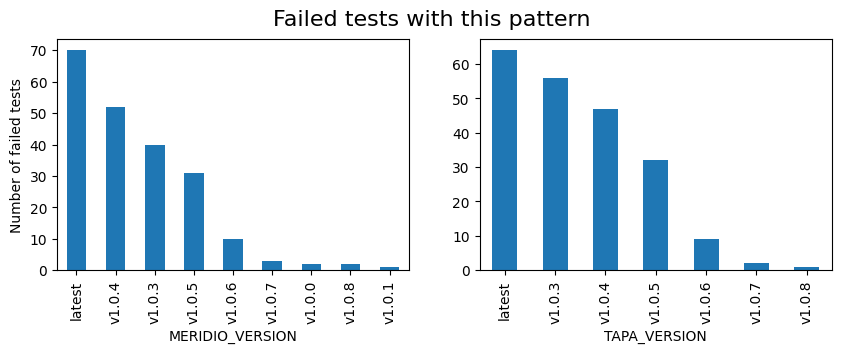

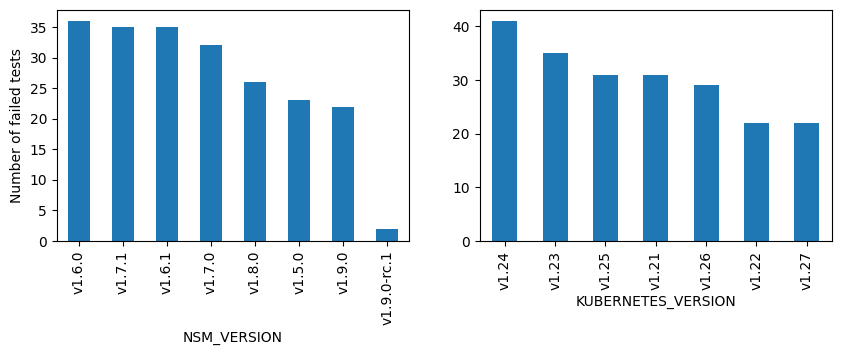

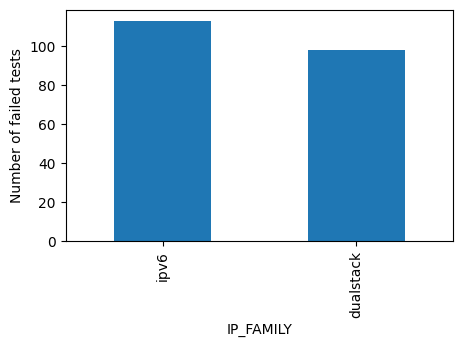

Tests that have failed because of this pattern


,MERIDIO_VERSION,TAPA_VERSION,BUILD_ID,NSM_VERSION,KUBERNETES_VERSION,IP_FAMILY
28,latest,latest,10987,v1.6.0,v1.25,ipv6
73,latest,latest,11032,v1.6.0,v1.26,ipv6
148,latest,latest,11107,v1.7.1,v1.24,ipv6
168,latest,latest,11127,v1.7.0,v1.26,dualstack
363,latest,latest,11326,v1.6.0,v1.25,dualstack
...,...,...,...,...,...,...
13044,v1.0.3,v1.0.3,24357,v1.6.0,v1.21,ipv6
13050,v1.0.7,v1.0.8,24363,v1.7.0,v1.24,dualstack
13097,latest,v1.0.3,24410,v1.7.1,v1.21,ipv6
13169,v1.0.5,v1.0.4,24483,v1.9.0,v1.25,ipv6


In [4]:
if len(f_before) > 0:
    found_f = analyze(f_before.iloc[0], df)
    print("Tests that have failed because of this pattern")
    display(found_f)
else:
    print("No pattern detected.")

### First pattern after elimination

Here, we will make a detailed analysis on the most observed pattern after eliminating redundant patterns.

Analysis for pattern: new-stream ==> Scale-Up ==> UDP-IPv6
This pattern is observed 1446 times in all 13216 tests. 10.94128329297821 %
The test UDP-IPv6 failed 91 times in 1446 tests in which this pattern is observed. 6.293222683264177 %
This pattern is observed 12.06 % of all failed test cases 

Failed tests for this pattern:
UDP-IPv6                             91
conduit-destination-port-nats         4
open-second-stream-second-conduit     4
flow-priority                         4
open-second-stream                    3
new-stream                            3
MT-Switch                             3
MT-Parallel                           3
stream-max-targets                    3
UDP-IPv4                              2
flow-destination-ports-range          2
TCP-IPv6                              2
new-attractor-nsm-vlan                2
new-flow                              2
Scale-Up                              2
TCP-IPv4                              1
Scale-Down                     

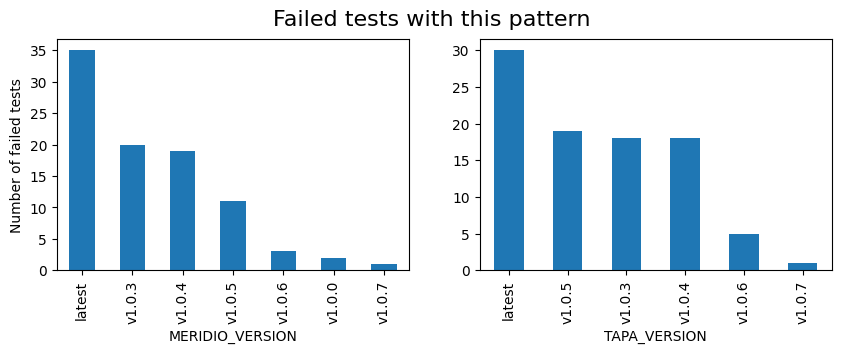

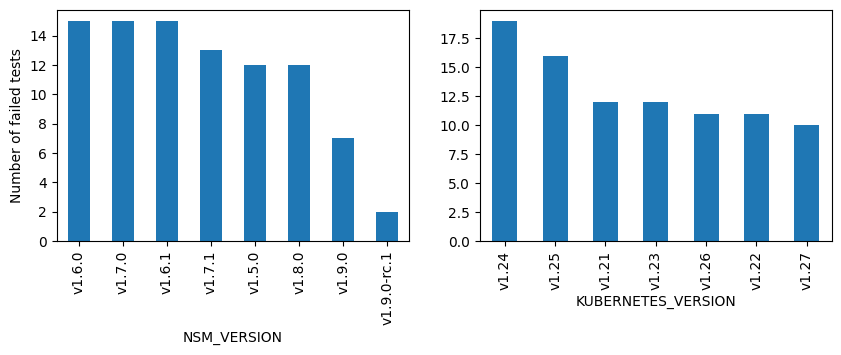

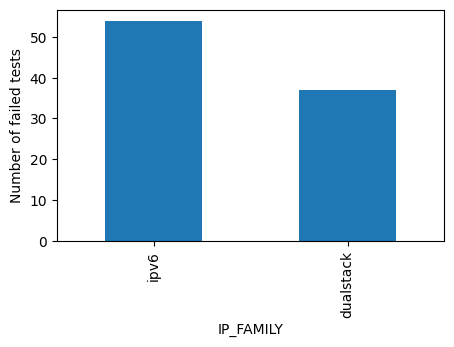

Tests that have failed because of this pattern


,MERIDIO_VERSION,TAPA_VERSION,BUILD_ID,NSM_VERSION,KUBERNETES_VERSION,IP_FAMILY
73,latest,latest,11032,v1.6.0,v1.26,ipv6
148,latest,latest,11107,v1.7.1,v1.24,ipv6
363,latest,latest,11326,v1.6.0,v1.25,dualstack
892,latest,latest,11857,v1.7.0,v1.21,ipv6
936,latest,latest,11901,v1.6.0,v1.26,dualstack
...,...,...,...,...,...,...
12510,v1.0.4,v1.0.6,23819,v1.7.0,v1.26,ipv6
12557,v1.0.3,v1.0.6,23866,v1.6.0,v1.21,dualstack
12704,v1.0.5,v1.0.4,24017,v1.5.0,v1.25,ipv6
12777,v1.0.4,v1.0.6,24090,v1.7.0,v1.26,dualstack


In [5]:
if len(f) > 0:
    found_f = analyze(f.iloc[0], df)
    print("Tests that have failed because of this pattern")
    display(found_f)
else:
    print("No pattern detected after elimination.")